# Analytical Solutions in the case of irreversible aggregation

The goal is first explore the case of irreversible aggregation. We will then attempt to tackle the problem of chaperone-mediated disaggregation, applying our intuition about the stoichiometry of the reaction to see how this changes the evolution of the system.

## General

We want to describe the time-evolution of a system of particles which have a tendency to aggregate and explicitly account for clusters of all sizes. In all cases we describe the collision between a cluster of size i and a cluster of size j (where i and j are integer quantites - the number of monomers for example) to produce a cluster of size $k = i + j$. That is:

\begin{equation}
    A_i + A_j \xrightarrow[]{K_{ij}} A_{i+j}
\end{equation}

By the laws of mass action we expect the rate of change of the concentration of clusters of a particular size to be equal to the additive rates of creation and destruction. Creation can be accounted for by any combination of i and j that equal k, and destruction is in the reaction of a k-mer with a cluster of any other size (remember that this is irreversible aggregation, so clusters cannot fall apart). These interactions can be captured by the following master equation:

\begin{equation}
    \frac{dc_k}{dt} = \frac{1}{2}\sum_{i,j}K_{ij}c_i(t)c_j(t)[\delta_{i+j,k} - \delta_{i,k} - \delta_{j,k}]
\end{equation}

where $\delta$ is 1 when $i$, $j$, or $i+j = k$, and 0 otherwise. $K_{ij}$ is the aggregation kernel, and it describes the rates of aggregation of clusters of size i and j. It is symmetric, meaning that $K_{ij} = K_{ji}$.

We can explicitly break up this equation into creation and destruction terms in the following manner:

\begin{equation}
    \frac{dc_k}{dt} = \frac{1}{2}\sum_{j=1}^{k-1}K_{j,k-j}c_j(t)c_{k-j}(t) - c_k(t)\sum_{i=1}^{\infty}K_{ik}c_{i}(t)
\end{equation}

## Constant Aggregation Rate

### Solutions to the Master Equations

The master equation above is only analytically tractable for simple kernels. We first consider the case of constant aggregation rates - that is $K_{ij}$ is the same for all i,j. If we select $K_{ij}$ to be 2, the master equations are:

\begin{equation}
    \frac{dc_k}{dt} = \sum_{i+j=k}c_ic_j - 2c_k(t)\sum_ic_i(t) \equiv \sum_{i+j=k}c_ic_j - 2c_k(t)N
\end{equation}

Where $N$ is the total concentration of the system - note that this is not constant because the creation of larger species from several smaller species will result in a smaller sum. Indeed, we should expect that in general the total concentration of the system should decrease with time (as the aggregation is irreversible), although the conservation of mass states that the mass density should be constant.

These equations have a closed form solution:

\begin{equation}
    c_k(t) = \frac{t^{k-1}}{(1+t)^{k+1}}
\end{equation}

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2, style="white")

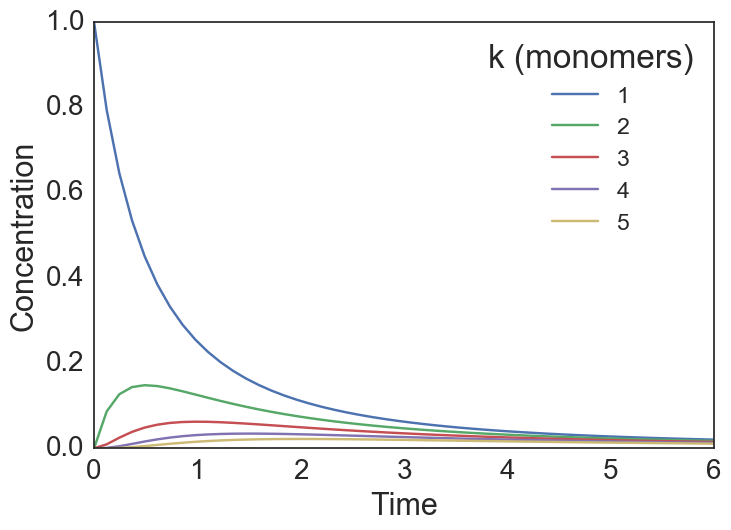

In [26]:
#plot solutions for several values of k:

def kmer_conc_v_time(k,t):
    ck = t**(k - 1) / (1 + t)**(k + 1)
    return ck


t = np.linspace(0,6)

for i in range(1,6):
    c = kmer_conc_v_time(i,t)
    plt.plot(t,c, label=str(i))
    plt.legend(title="k (monomers)", fontsize='x-small')
    plt.xlabel('Time')
    plt.ylabel('Concentration')

### Moments of the Distribution

In general the $n$th moment is defined as

\begin{equation}
    M_n(t) = \sum_k k^n c_k(t)
\end{equation}

and 

\begin{equation}
    \dot{M_n} = \sum_{k=1}^\infty k^n \dot{c_k}
\end{equation}

The moments have the following form

\begin{equation}
    M_n \approx n!t^{n-1}; t \rightarrow \infty
\end{equation}

From the moments we can learn things like the average cluster mass $\left(\equiv M_1/M_0\right)$. Specifically, the zeroth and first moments are

\begin{equation}
    \begin{aligned}
        M_0(t) \equiv N(t) &= \frac{1}{1+t} \\
        \\
        M_1(t) &= 1
    \end{aligned}
\end{equation}

Note that in this system concentration is not conserved - this is because the coagulation of particles reduces the total number of particles in the system over time. However, we note that the total mass of the system *is* conserved, as reflected by the first moment being constant. These observations confirm that the average cluster size increases over time, and in fact is exactly the inverse of the rate of change of the total concentration in the system.